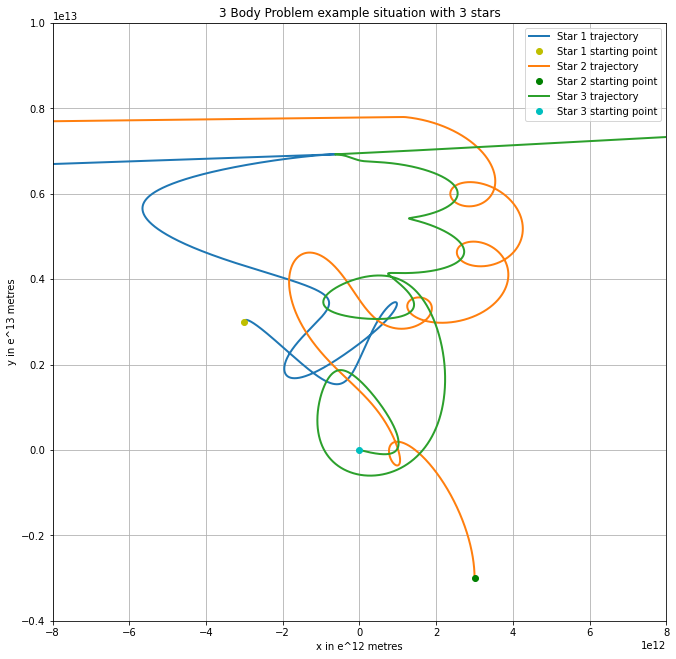

In [1]:
mstar1=3.15e30
mstar2=3.1e30
mstar3=3.4e30

import numpy as np
import matplotlib.pyplot as plt

G=6.67408e-11
D=1e12

tmax=8e9
dt=5e5
N = int(tmax/dt)
v0=1e3

t = np.zeros((N,))

r1 = np.zeros((2,N))
r2 = np.zeros((2,N))
r3 = np.zeros((2,N))

v1 = np.zeros((2,N))
v2 = np.zeros((2,N))
v3 = np.zeros((2,N))

a1 = np.zeros((2,N))
a2 = np.zeros((2,N))
a3 = np.zeros((2,N))

r1[:,0]=np.array([-3*D,3*D])
r2[:,0]=np.array([3*D,-3*D])
r3[:,0]=np.array([0,0])

v1[:,0]=np.array([0,v0])
v2[:,0]=np.array([0,5*v0])
v3[:,0]=np.array([0,0])


def NGL1(t):
    return G *(mstar2* (r2[:,t]-r1[:,t]) / (1e5+np.linalg.norm(r2[:,t]-r1[:
           ,t])**3) + mstar3* (r3[:,t]-r1[:,t]) / (1e5+np.linalg.norm(r3[:,t]-r1[:
           ,t])**3))

def NGL2(t):
    return G *(mstar1* (r1[:,t]-r2[:,t]) / (1e5+np.linalg.norm(r1[:,t]-r2[:
           ,t])**3) + mstar3* (r3[:,t]-r2[:,t]) / (1e5+np.linalg.norm(r3[:,t]-r2[:
           ,t])**3))

def NGL3(t):
    return G *(mstar1* (r1[:,t]-r3[:,t]) / (1e5+np.linalg.norm(r1[:,t]-r3[:
           ,t])**3) + mstar2* (r2[:,t]-r3[:,t]) / (1e5+np.linalg.norm(r2[:,t]-r3[:
           ,t])**3))


a1[:,0]=NGL1(0)
a2[:,0]=NGL2(0)
a3[:,0]=NGL3(0)

plt.figure(figsize=(11,11))
for n in range(0,N-1):
    t[n+1] = t[n] + dt
    r1[:,n+1]=r1[:,n] + ( v1[:,n]*(dt)) + (0.5*(a1[:,n])* ((dt)**2))
    r2[:,n+1]=r2[:,n] + ( v2[:,n]*(dt)) + (0.5*(a2[:,n])* ((dt)**2))
    r3[:,n+1]=r3[:,n] + ( v3[:,n]*(dt)) + (0.5*(a3[:,n])* ((dt)**2))
    a1[:,n+1]=NGL1(n+1)
    a2[:,n+1]=NGL2(n+1)
    a3[:,n+1]=NGL3(n+1)
    v1[:,n+1]=v1[:,n]+0.5*(a1[:,n+1]+a1[:,n])*(dt)
    v2[:,n+1]=v2[:,n]+0.5*(a2[:,n+1]+a2[:,n])*(dt)
    v3[:,n+1]=v3[:,n]+0.5*(a3[:,n+1]+a3[:,n])*(dt)


plt.plot(r1[0,:],r1[1,:],lw=2,label='Star 1 trajectory')
plt.plot(r1[0,0],r1[1,0],'yo',lw=4,label='Star 1 starting point')
plt.plot(r2[0,:],r2[1,:],lw=2,label='Star 2 trajectory')
plt.plot(r2[0,0],r2[1,0],'go',lw=4,label='Star 2 starting point')
plt.plot(r3[0,:],r3[1,:],lw=2,label='Star 3 trajectory')
plt.plot(r3[0,0],r3[1,0],'co',lw=4,label='Star 3 starting point')

plt.xlabel('x in e^12 metres')
plt.ylabel('y in e^13 metres')
plt.legend()
plt.title('3 Body Problem example situation with 3 stars')
plt.xlim(-8e12,8e12)
plt.ylim(-4e12,10e12)
plt.grid(True)
plt.show()


The first plot is our simulation if we increase mass of star 1 by 3.1746031746031633 percent
The second plot is our simulation if we increase mass of star 1 by 6.349206349206355 percent 


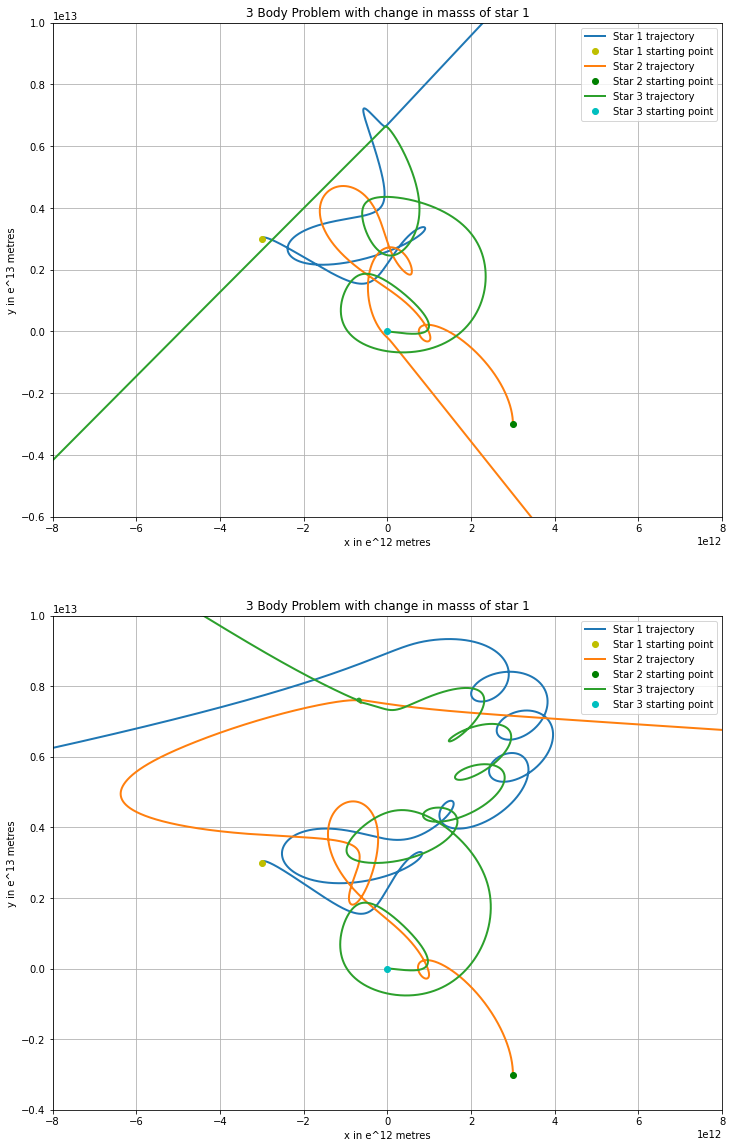

In [2]:
from matplotlib import cm

plt.figure(figsize=(12,20))

m_increase=(mstar1+1e29)/mstar1*100-100

mstar1=mstar1+1e29

t = np.zeros((N,))

r1 = np.zeros((2,N))
r2 = np.zeros((2,N))
r3 = np.zeros((2,N))

v1 = np.zeros((2,N))
v2 = np.zeros((2,N))
v3 = np.zeros((2,N))

a1 = np.zeros((2,N))
a2 = np.zeros((2,N))
a3 = np.zeros((2,N))

r1[:,0]=np.array([-3*D,3*D])
r2[:,0]=np.array([3*D,-3*D])
r3[:,0]=np.array([0,0])

v1[:,0]=np.array([0,v0])
v2[:,0]=np.array([0,5*v0])
v3[:,0]=np.array([0,0])

a1[:,0]=NGL1(0)
a2[:,0]=NGL2(0)
a3[:,0]=NGL3(0)

for n in range(0,N-1):
    
    t[n+1] = t[n] + dt
    r1[:,n+1]=r1[:,n] + ( v1[:,n]*(dt)) + (0.5*(a1[:,n])* ((dt)**2))
    r2[:,n+1]=r2[:,n] + ( v2[:,n]*(dt)) + (0.5*(a2[:,n])* ((dt)**2))
    r3[:,n+1]=r3[:,n] + ( v3[:,n]*(dt)) + (0.5*(a3[:,n])* ((dt)**2))
    a1[:,n+1]=NGL1(n+1)
    a2[:,n+1]=NGL2(n+1)
    a3[:,n+1]=NGL3(n+1)
    v1[:,n+1]=v1[:,n]+0.5*(a1[:,n+1]+a1[:,n])*(dt)
    v2[:,n+1]=v2[:,n]+0.5*(a2[:,n+1]+a2[:,n])*(dt)
    v3[:,n+1]=v3[:,n]+0.5*(a3[:,n+1]+a3[:,n])*(dt)
    
    
plt.subplot(211)
plt.plot(r1[0,:],r1[1,:],lw=2,label='Star 1 trajectory')
plt.plot(r1[0,0],r1[1,0],'yo',lw=4,label='Star 1 starting point')
plt.plot(r2[0,:],r2[1,:],lw=2,label='Star 2 trajectory')
plt.plot(r2[0,0],r2[1,0],'go',lw=4,label='Star 2 starting point')
plt.plot(r3[0,:],r3[1,:],lw=2,label='Star 3 trajectory')
plt.plot(r3[0,0],r3[1,0],'co',lw=4,label='Star 3 starting point')

plt.xlabel('x in e^12 metres')
plt.ylabel('y in e^13 metres')
plt.legend()
plt.title('3 Body Problem with change in masss of star 1')
plt.xlim(-8e12,8e12)
plt.ylim(-6e12,10e12)
plt.grid(True)

m_increase2=((3.15e30+2e29)/(3.15e30)) *100 - 100

mstar1=mstar1+1e29

print('The first plot is our simulation if we increase mass of star 1 by '+
str(m_increase) + ' percent')

print('The second plot is our simulation if we increase mass of star 1 by '+
str(m_increase2) + ' percent ')

t = np.zeros((N,))

r1 = np.zeros((2,N))
r2 = np.zeros((2,N))
r3 = np.zeros((2,N))

v1 = np.zeros((2,N))
v2 = np.zeros((2,N))
v3 = np.zeros((2,N))

a1 = np.zeros((2,N))
a2 = np.zeros((2,N))
a3 = np.zeros((2,N))

r1[:,0]=np.array([-3*D,3*D])
r2[:,0]=np.array([3*D,-3*D])
r3[:,0]=np.array([0,0])

v1[:,0]=np.array([0,v0])
v2[:,0]=np.array([0,5*v0])
v3[:,0]=np.array([0,0])

a1[:,0]=NGL1(0)
a2[:,0]=NGL2(0)
a3[:,0]=NGL3(0)

for n in range(0,N-1):
    t[n+1] = t[n] + dt
    r1[:,n+1]=r1[:,n] + ( v1[:,n]*(dt)) + (0.5*(a1[:,n])* ((dt)**2))
    r2[:,n+1]=r2[:,n] + ( v2[:,n]*(dt)) + (0.5*(a2[:,n])* ((dt)**2))
    r3[:,n+1]=r3[:,n] + ( v3[:,n]*(dt)) + (0.5*(a3[:,n])* ((dt)**2))
    a1[:,n+1]=NGL1(n+1)
    a2[:,n+1]=NGL2(n+1)
    a3[:,n+1]=NGL3(n+1)
    v1[:,n+1]=v1[:,n]+0.5*(a1[:,n+1]+a1[:,n])*(dt)
    v2[:,n+1]=v2[:,n]+0.5*(a2[:,n+1]+a2[:,n])*(dt)
    v3[:,n+1]=v3[:,n]+0.5*(a3[:,n+1]+a3[:,n])*(dt)
    
    
plt.subplot(212)
plt.plot(r1[0,:],r1[1,:],lw=2,label='Star 1 trajectory')
plt.plot(r1[0,0],r1[1,0],'yo',lw=4,label='Star 1 starting point')
plt.plot(r2[0,:],r2[1,:],lw=2,label='Star 2 trajectory')
plt.plot(r2[0,0],r2[1,0],'go',lw=4,label='Star 2 starting point')
plt.plot(r3[0,:],r3[1,:],lw=2,label='Star 3 trajectory')
plt.plot(r3[0,0],r3[1,0],'co',lw=4,label='Star 3 starting point')

plt.xlabel('x in e^12 metres')
plt.ylabel('y in e^13 metres')
plt.legend()
plt.title('3 Body Problem with change in masss of star 1')
plt.xlim(-8e12,8e12)
plt.ylim(-4e12,10e12)
plt.grid(True)
plt.show()

The first plot is our simulation if we increase mass of star 1 by 3.1746031746031633 percent
The second plot is our simulation if we increase mass of star 1 by 6.349206349206355 percent 


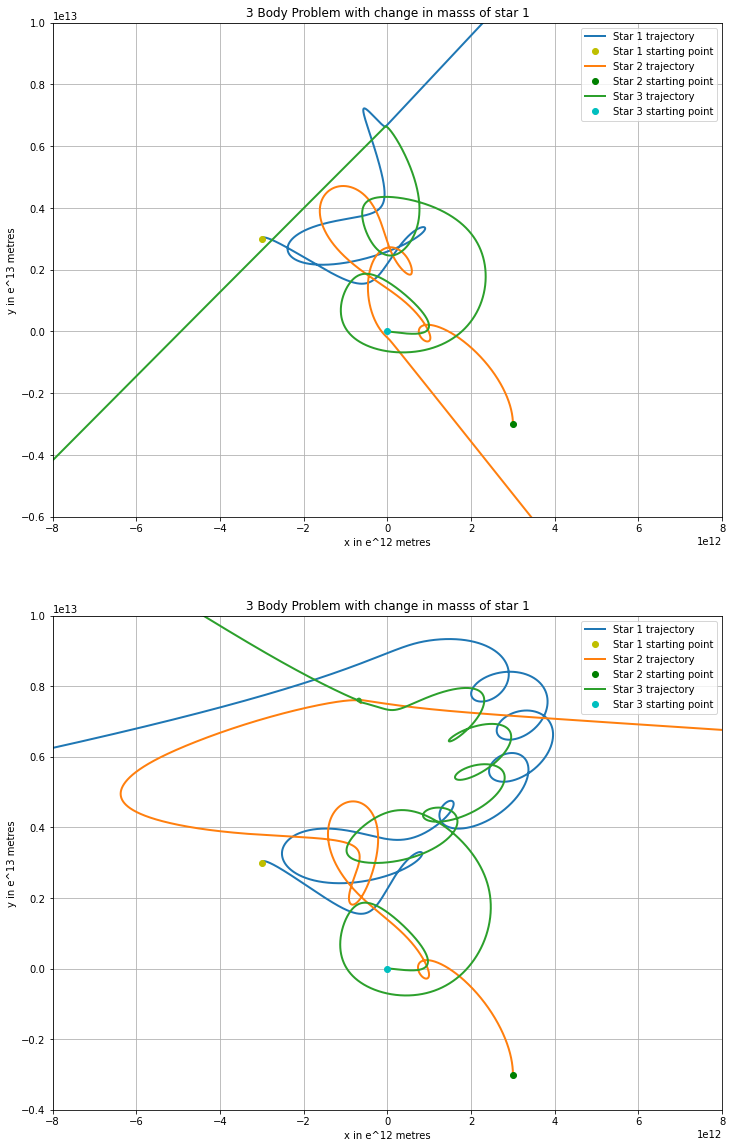

In [ ]:
from matplotlib import cm

plt.figure(figsize=(12,20))

m_increase=(mstar1+1e29)/mstar1*100-100

mstar1=mstar1+1e29

t = np.zeros((N,))

r1 = np.zeros((2,N))
r2 = np.zeros((2,N))
r3 = np.zeros((2,N))

v1 = np.zeros((2,N))
v2 = np.zeros((2,N))
v3 = np.zeros((2,N))

a1 = np.zeros((2,N))
a2 = np.zeros((2,N))
a3 = np.zeros((2,N))

r1[:,0]=np.array([-3*D,3*D])
r2[:,0]=np.array([3*D,-3*D])
r3[:,0]=np.array([0,0])

v1[:,0]=np.array([0,v0])
v2[:,0]=np.array([0,5*v0])
v3[:,0]=np.array([0,0])

a1[:,0]=NGL1(0)
a2[:,0]=NGL2(0)
a3[:,0]=NGL3(0)

for n in range(0,N-1):
    
    t[n+1] = t[n] + dt
    r1[:,n+1]=r1[:,n] + ( v1[:,n]*(dt)) + (0.5*(a1[:,n])* ((dt)**2))
    r2[:,n+1]=r2[:,n] + ( v2[:,n]*(dt)) + (0.5*(a2[:,n])* ((dt)**2))
    r3[:,n+1]=r3[:,n] + ( v3[:,n]*(dt)) + (0.5*(a3[:,n])* ((dt)**2))
    a1[:,n+1]=NGL1(n+1)
    a2[:,n+1]=NGL2(n+1)
    a3[:,n+1]=NGL3(n+1)
    v1[:,n+1]=v1[:,n]+0.5*(a1[:,n+1]+a1[:,n])*(dt)
    v2[:,n+1]=v2[:,n]+0.5*(a2[:,n+1]+a2[:,n])*(dt)
    v3[:,n+1]=v3[:,n]+0.5*(a3[:,n+1]+a3[:,n])*(dt)
    
    
plt.subplot(211)
plt.plot(r1[0,:],r1[1,:],lw=2,label='Star 1 trajectory')
plt.plot(r1[0,0],r1[1,0],'yo',lw=4,label='Star 1 starting point')
plt.plot(r2[0,:],r2[1,:],lw=2,label='Star 2 trajectory')
plt.plot(r2[0,0],r2[1,0],'go',lw=4,label='Star 2 starting point')
plt.plot(r3[0,:],r3[1,:],lw=2,label='Star 3 trajectory')
plt.plot(r3[0,0],r3[1,0],'co',lw=4,label='Star 3 starting point')

plt.xlabel('x in e^12 metres')
plt.ylabel('y in e^13 metres')
plt.legend()
plt.title('3 Body Problem with change in masss of star 1')
plt.xlim(-8e12,8e12)
plt.ylim(-6e12,10e12)
plt.grid(True)

m_increase2=((3.15e30+2e29)/(3.15e30)) *100 - 100

mstar1=mstar1+1e29

print('The first plot is our simulation if we increase mass of star 1 by '+ str(m_increase) + ' percent')

print('The second plot is our simulation if we increase mass of star 1 by '+ str(m_increase2) + ' percent ')

t = np.zeros((N,))

r1 = np.zeros((2,N))
r2 = np.zeros((2,N))
r3 = np.zeros((2,N))

v1 = np.zeros((2,N))
v2 = np.zeros((2,N))
v3 = np.zeros((2,N))

a1 = np.zeros((2,N))
a2 = np.zeros((2,N))
a3 = np.zeros((2,N))

r1[:,0]=np.array([-3*D,3*D])
r2[:,0]=np.array([3*D,-3*D])
r3[:,0]=np.array([0,0])

v1[:,0]=np.array([0,v0])
v2[:,0]=np.array([0,5*v0])
v3[:,0]=np.array([0,0])

a1[:,0]=NGL1(0)
a2[:,0]=NGL2(0)
a3[:,0]=NGL3(0)

for n in range(0,N-1):
    t[n+1] = t[n] + dt
    r1[:,n+1]=r1[:,n] + ( v1[:,n]*(dt)) + (0.5*(a1[:,n])* ((dt)**2))
    r2[:,n+1]=r2[:,n] + ( v2[:,n]*(dt)) + (0.5*(a2[:,n])* ((dt)**2))
    r3[:,n+1]=r3[:,n] + ( v3[:,n]*(dt)) + (0.5*(a3[:,n])* ((dt)**2))
    a1[:,n+1]=NGL1(n+1)
    a2[:,n+1]=NGL2(n+1)
    a3[:,n+1]=NGL3(n+1)
    v1[:,n+1]=v1[:,n]+0.5*(a1[:,n+1]+a1[:,n])*(dt)
    v2[:,n+1]=v2[:,n]+0.5*(a2[:,n+1]+a2[:,n])*(dt)
    v3[:,n+1]=v3[:,n]+0.5*(a3[:,n+1]+a3[:,n])*(dt)
    
    
plt.subplot(212)
plt.plot(r1[0,:],r1[1,:],lw=2,label='Star 1 trajectory')
plt.plot(r1[0,0],r1[1,0],'yo',lw=4,label='Star 1 starting point')
plt.plot(r2[0,:],r2[1,:],lw=2,label='Star 2 trajectory')
plt.plot(r2[0,0],r2[1,0],'go',lw=4,label='Star 2 starting point')
plt.plot(r3[0,:],r3[1,:],lw=2,label='Star 3 trajectory')
plt.plot(r3[0,0],r3[1,0],'co',lw=4,label='Star 3 starting point')

plt.xlabel('x in e^12 metres')
plt.ylabel('y in e^13 metres')
plt.legend()
plt.title('3 Body Problem with change in masss of star 1')
plt.xlim(-8e12,8e12)
plt.ylim(-4e12,10e12)
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


tmax=1e8
dt=1e5
N = int(tmax/dt)

fig = plt.figure(figsize=(16,14))
ax = fig.gca(projection='3d')

xvec = np.arange(-6e12, 6e12, 1e7)
yvec = np.arange(-6e12, 6e12, 1e7)
xmat, ymat = np.meshgrid(xvec, yvec)


mstar1=3e30
mstar2=3e30
mstar3=4e30

t = np.zeros((N,))

r1 = np.zeros((3,N))
r2 = np.zeros((3,N))
r3 = np.zeros((3,N))

v1 = np.zeros((3,N))
v2 = np.zeros((3,N))
v3 = np.zeros((3,N))

a1 = np.zeros((3,N))
a2 = np.zeros((3,N))
a3 = np.zeros((3,N))

r1[:,0]=np.array([-3*D,3*D,-3*D])
r2[:,0]=np.array([3*D,-3*D,3*D])
r3[:,0]=np.array([0,0,0])

v1[:,0]=np.array([0,0,0])
v2[:,0]=np.array([0,0,0])
v3[:,0]=np.array([0,0,0])

a1[:,0]=NGL1(0)
a2[:,0]=NGL2(0)
a3[:,0]=NGL3(0)

for n in range(0,N-1):
    t[n+1] = t[n] + dt
    r1[:,n+1]=r1[:,n] + ( v1[:,n]*(dt)) + (0.5*(a1[:,n])* ((dt)**2))
    r2[:,n+1]=r2[:,n] + ( v2[:,n]*(dt)) + (0.5*(a2[:,n])* ((dt)**2))
    r3[:,n+1]=r3[:,n] + ( v3[:,n]*(dt)) + (0.5*(a3[:,n])* ((dt)**2))
    a1[:,n+1]=NGL1(n+1)
    a2[:,n+1]=NGL2(n+1)
    a3[:,n+1]=NGL3(n+1)
    v1[:,n+1]=v1[:,n]+0.5*(a1[:,n+1]+a1[:,n])*(dt)
    v2[:,n+1]=v2[:,n]+0.5*(a2[:,n+1]+a2[:,n])*(dt)
    v3[:,n+1]=v3[:,n]+0.5*(a3[:,n+1]+a3[:,n])*(dt)
    
star1_plot = ax.plot(r1[0,:],r1[1,:],r1[2,:],linewidth=3)
star2_plot = ax.plot(r2[0,:],r2[1,:],r2[2,:],linewidth=3)
star3_plot = ax.plot(r3[0,:],r3[1,:],r3[2,:],linewidth=3)

ax.set_xlim(-8e12, 8e12)
ax.set_ylim(-8e12, 8e12)
ax.set_zlim(-8e12, 8e12)
plt.show()